In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.models import model_from_json
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from datetime import date

import datetime
from tensorflow.keras.callbacks import TensorBoard
from keras import backend as K
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 8
import h5py
import glob
import cv2
import os
import zipfile 
%matplotlib inline

print('Using Tensorflow version : ', tf.__version__)

Using Tensorflow version :  2.5.0


In [2]:
!wget --no-check-certificate \
 https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-18 05:55:09--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  3.45MB/s    in 64s     

2021-07-18 05:56:15 (4.78 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

gunting_dir_path = os.path.join('/content/rockpaperscissors/rps-cv-images/scissors')
batu_dir_path = os.path.join('/content/rockpaperscissors/rps-cv-images/rock')
kertas_dir_path = os.path.join('/content/rockpaperscissors/rps-cv-images/paper')

print('Banyak gambar gunting:', len(os.listdir(gunting_dir_path)))
print('Banyak gambar batu:', len(os.listdir(batu_dir_path)))
print('Banyak gambar kertas:', len(os.listdir(kertas_dir_path)))

Banyak gambar gunting: 750
Banyak gambar batu: 726
Banyak gambar kertas: 712


In [4]:
BASE_DIR_PATH = "/content/rockpaperscissors/rps-cv-images/"

train_datagen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range = 20,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    zoom_range = 0.2,
                                    shear_range = 0.2,
                                    horizontal_flip = True,
                                    fill_mode='nearest',
                                    validation_split = 0.4)

In [5]:
size = 224
BATCH_SIZE = 32

training_set = train_datagen.flow_from_directory(BASE_DIR_PATH,
                                                 target_size = (size, size),
                                                 batch_size  = BATCH_SIZE,
                                                 class_mode  = 'categorical',
                                                 shuffle     = True,
                                                 subset      = 'training')

validation_set = train_datagen.flow_from_directory(BASE_DIR_PATH,
                                                   target_size = (size, size),
                                                   batch_size  = BATCH_SIZE,
                                                   class_mode  = 'categorical',
                                                   shuffle     = True,
                                                   subset      = 'validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [6]:
model = tf.keras.models.Sequential([  
                                    
        tf.keras.layers.Conv2D(16, (3, 3), input_shape = (size, size, 3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),

        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Dense(units=128, activation='relu'),
        tf.keras.layers.Dense(units=512, activation='relu'),
            
        tf.keras.layers.Dense(units = 3, 
                           activation='softmax')
        ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [7]:
model.compile(loss = 'categorical_crossentropy',                                  
              optimizer = 'adam',                                                
              metrics = ['accuracy'])

In [9]:
history = model.fit(
          training_set,
          # steps_per_epoch = np.ceil(float(1314) / float(BATCH_SIZE)),
          steps_per_epoch = 8,
          epochs = 50,
          validation_data = validation_set,
          # validation_steps = np.ceil(float(874) / float(BATCH_SIZE)),
          validation_steps = 8,
          verbose = 1)

Epoch 1/50
8/8 [==============================] - 22s 3s/step - loss: 1.1180 - accuracy: 0.3672 - val_loss: 1.0896 - val_accuracy: 0.4688
Epoch 2/50
8/8 [==============================] - 21s 3s/step - loss: 1.0691 - accuracy: 0.4531 - val_loss: 1.0900 - val_accuracy: 0.3594
Epoch 3/50
8/8 [==============================] - 21s 3s/step - loss: 1.0754 - accuracy: 0.3984 - val_loss: 1.0703 - val_accuracy: 0.3594
Epoch 4/50
8/8 [==============================] - 21s 3s/step - loss: 1.0654 - accuracy: 0.3984 - val_loss: 1.0265 - val_accuracy: 0.4766
Epoch 5/50
8/8 [==============================] - 21s 3s/step - loss: 1.0187 - accuracy: 0.4453 - val_loss: 0.9928 - val_accuracy: 0.4531
Epoch 6/50
8/8 [==============================] - 21s 3s/step - loss: 1.0055 - accuracy: 0.4883 - val_loss: 0.9110 - val_accuracy: 0.5625
Epoch 7/50
8/8 [==============================] - 20s 2s/step - loss: 0.9248 - accuracy: 0.5531 - val_loss: 0.9163 - val_accuracy: 0.5195
Epoch 8/50
8/8 [==================

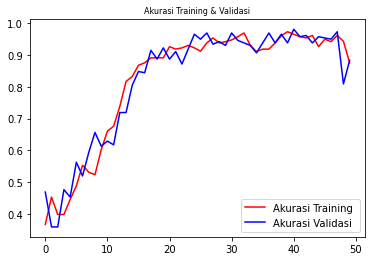

<Figure size 432x288 with 0 Axes>

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Training ')
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Training & Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

Saving Rock-paper-scissors_(paper).png to Rock-paper-scissors_(paper).png
Rock-paper-scissors_(paper).png
Tangan Ini Membentuk KERTAS


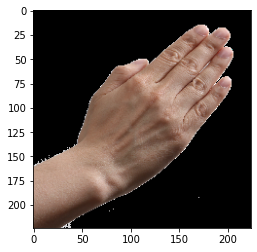

In [11]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(size, size))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=BATCH_SIZE)
  print(fn)
  if classes[0][0]==1:
    print('Tangan Ini Membentuk KERTAS')
  elif classes[0][1]==1:
    print('Tangan Ini Membentuk BATU')
  elif classes[0][2]==1:
    print('Tangan Ini Membentuk GUNTING')
  else:
    print('Bentuk Tidak Dikenali Oleh Sistem')